In [ ]:
pip install hmmlearn==0.2.7

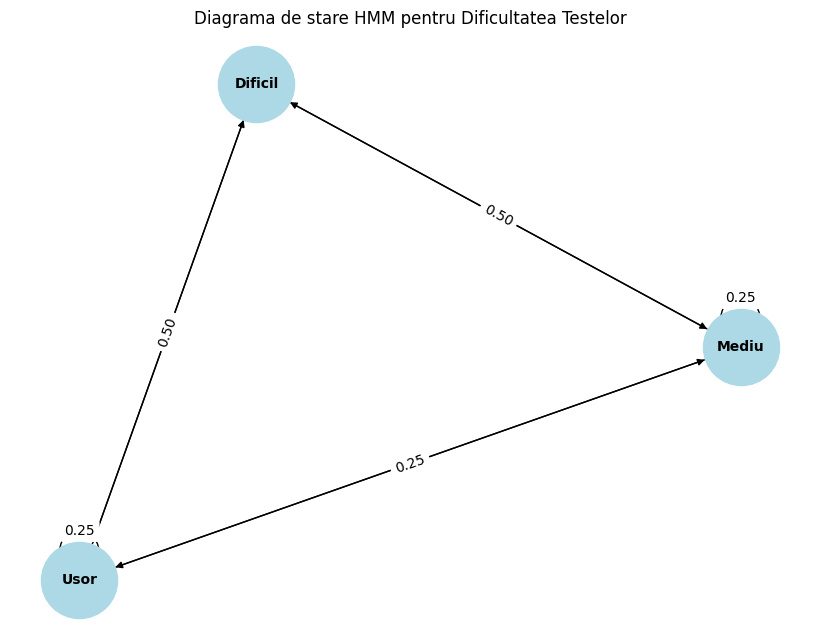


Cea mai probabila secventa de dificultati pentru testele corespunzatoare:
['Usor', 'Usor', 'Dificil', 'Usor', 'Dificil', 'Mediu', 'Dificil', 'Usor', 'Dificil', 'Usor', 'Dificil', 'Mediu']

Log-probabilitatea secventei: -24.582044327855733


In [5]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import networkx as nx

#a)

states = ["Dificil", "Mediu", "Usor"]
n_states = len(states)

observations = ["FB", "B", "NS"]
n_observations = len(observations)

transition_matrix = np.array([
    [0.0, 0.5, 0.5],
    [0.5, 0.25, 0.25],
    [0.5, 0.25, 0.25]
])

emission_matrix = np.array([
    [0.1, 0.2, 0.4, 0.3],
    [0.15, 0.25, 0.5, 0.1],
    [0.2, 0.3, 0.4, 0.1]
])

start_probabilities = np.array([1/3, 1/3, 1/3])

model = hmm.MultinomialHMM(n_components=n_states)
model.startprob_ = start_probabilities
model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix

G = nx.DiGraph()

for i, state in enumerate(states):
    G.add_node(state)

for i in range(n_states):
    for j in range(n_states):
        if transition_matrix[i, j] > 0:
            G.add_edge(states[i], states[j], weight=transition_matrix[i, j])

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Diagrama de stare HMM pentru Dificultatea Testelor")
plt.show()


#b)

observed_sequence = np.array([[0, 0, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2]]).T

logprob, hidden_states = model.decode(observed_sequence, algorithm="viterbi")

most_probable_difficulties = [states[state] for state in hidden_states]

print("\nCea mai probabila secventa de dificultati pentru testele corespunzatoare:")
print(most_probable_difficulties)
print("\nLog-probabilitatea secventei:", logprob)
